# Introduksjon
I dette prosjektet skal vi se på to forskjellige tilnærminger med (maskin læring) praktiske eksempler fra astronomi og helsefag.

I topic 1 arbeider vi uten et "fasit", vi har fått bilder av melkeveien som vi skulle konvertere til RGB-piksler. Disse verdiene ble brukt for å lage en algortime ved hjelp av K-mean gjennom gruppering og finne mønstre. En algoritmen som oppdager strukutrer basert på likhet. Kan vi automatisk finne mønstre uten at noen forteller oss hva vi skal se?

I topic 2 skal vi bruke dataen vi har og lære fra den. I dette tilfelle skal vi finne ut av hvordan Ebola-epidemien utivklet seg i vest afrika ved hjelp av ulike maskinlæringsmodeller. Den gjetter seg frem ved å lære fra historiske data. Vi skal lære hvordan Hvorvidt maskinlæringen kan forutsi ting, hvordan de fungerer praktisk, hva er styrker og svakheter.


# Task 1

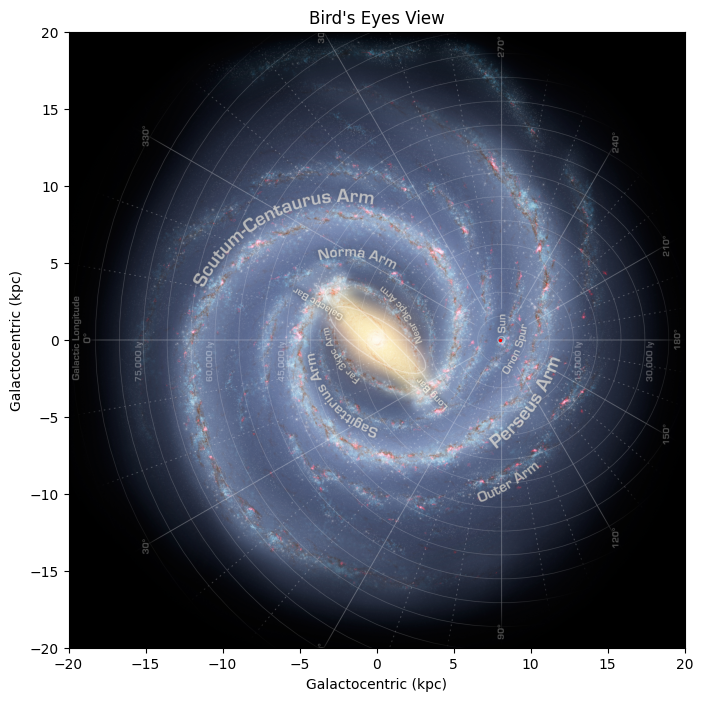

In [2]:
#Task 1: Install the git package and reproduce the image of the milky way via MWSkyMap (see attached code).
import numpy as np
from astropy import units as u
from mw_plot import MWFaceOn

mw1 = MWFaceOn(
    radius=20 * u.kpc,
    unit=u.kpc,
    coord="galactocentric",
    annotation=True,
    figsize=(10, 8),
)

mw1.title = "Bird's Eyes View"

mw1.scatter(8 * u.kpc, 0 * u.kpc, c="r", s=2)

# Task 2

In [ ]:
#Task 2: Generate a few (at least three in total) visualizations of the milky way sector starting in different centers (try "M31") and with different radius (be careful on the units!).
import matplotlib.pyplot as plt
from astropy import units as u
from mw_plot import MWSkyMap

mw1 = MWSkyMap(
    #center="M31",
    radius=(8800, 8800) * u.arcsec,
    background="Mellinger color optical survey",
)
fig, ax = plt.subplots(figsize=(5, 5))
mw1.transform(ax)
mw1.savefig('galaxy_large.png')

mw2 = MWSkyMap(
    #center="",
    radius=(5800, 5800) * u.arcsec,
    background="Mellinger color optical survey",
)
fig, ax = plt.subplots(figsize=(5, 5))
mw2.transform(ax)
mw2.savefig('galaxy_medium.png')

mw3 = MWSkyMap(
    #center="",
    radius=(2800, 2800) * u.arcsec,
    background="Mellinger color optical survey",
)
fig, ax = plt.subplots(figsize=(5, 5))
mw3.transform(ax)
mw3.savefig('galaxy_small.png')
plt.show()



We built three visualizations, with each starting in different centers. We then save each of the figures so that we can use them in later tasks.

# Task 3

In this cast we convert the image from task 2 that we chose (galaxy_medium.png) to a numpy array. This numpy array consists of the pixels being constituted as the three colors, red, blue and green. This conversion is done by a function that we made called image_to_rgb_array.

In [ ]:
# Task 3: Convert the image generated into a rgb np.array (each pixel will be a list of 3 number, Red, Green, Blue (rbg).
from functions import image_to_rgb_array
import matplotlib.pyplot as plt
from PIL import Image

# Topic 1 Task 3:
def image_to_rgb_array(image_path):
    """
    A function to load an image file and convert it to RGB np.array
    
    Input
    -----
    image_path: str
        Path to the image file
        
    Output
    ------
    np.array(h, w, 3): A 3d map of each pixel in RGB encoding
    """
    img = Image.open(image_path)
    rgb_array = np.array(img)
    
    # If image has alpha channel (RGBA), take only RGB
    if len(rgb_array.shape) == 3 and rgb_array.shape[2] == 4:
        rgb_array = rgb_array[:, :, :3]
    
    return rgb_array

# Use the function
rgb_array = image_to_rgb_array('galaxy_medium.png')
print(f"Shape: {rgb_array.shape}")
print(f"Data type: {rgb_array.dtype}")

# Verify it loaded correctly
plt.figure(figsize=(8, 8))
plt.imshow(rgb_array)
plt.title('Task 3: RGB Array')
plt.axis('off')
plt.show()

# Task 4

Here we want to create an encoding where we manually categorize each pixel to 3 color channels; Red, blue, and green (RGB). Very simple endocing, if red is bigger than blue and green, then the pixel is red-dominant. If blue is bigger than red and green, then blue-dominant etc...

In [ ]:
# Task 4
from functions import categorize_pixels

def categorize_pixels(rgb_array):
    """
    Kategoriser piksler som rød, grønn eller blå
    """
    import numpy as np
    h, w, _ = rgb_array.shape
    categories = np.zeros((h, w), dtype=int)
    for i in range(h):
        for j in range(w):
            r, g, b = rgb_array[i, j]
            if r > g and r > b:
                categories[i, j] = 0
            elif g > r and g > b:
                categories[i, j] = 1
            elif b > r and b > g:
                categories[i, j] = 2
    return categories

categories = categorize_pixels(rgb_array)

plt.figure(figsize=(8, 8))
plt.imshow(categories, cmap='RdYlBu')
plt.title('Task 4: Color Dominance Categories\n(0=Red, 1=Green, 2=Blue)')
plt.colorbar(label='Category')
plt.axis('off')
plt.show()

The map looks like this because in the Milky Way there are mostly warmer colors like red, yellow, and orange. There are barely any greens as well, and some stars have a hint of a strong blue in them.

# Task 5

In this task we used K-means clustering. This is a form of an unsupervised machine learning algorithm that groups similar data points by a number of clusters. Relative to this task, the clusters represent the color regions of the map, so the dark regions will clump toger, the brighter regions will clump together etc.. In total there are 6 clusters.

In [ ]:
# Task 5: Use K-NN (Nearest neighbor, not discussed in class but extremely simple) or K-means to cluster the data
from functions import apply_kmeans_clustering

def apply_kmeans_clustering(rgb_array, n_clusters=6, visualize=True):
    """
    Apply K-means clustering to an RGB array
    
    Input
    -----
    rgb_array: np.array
        RGB image array (h, w, 3)
    n_clusters: int
        Number of clusters (default: 6)
    visualize: bool
        Whether to show the clustering visualization
        
    Output
    ------
    predicted_image: np.array
        Cluster labels reshaped to image dimensions (h, w)
    kmeans: KMeans object
        Fitted KMeans model
    """
    from sklearn.cluster import KMeans
    import numpy as np
    import matplotlib.pyplot as plt
    
    h, w, _ = rgb_array.shape
    rgb_flat = rgb_array.reshape(-1, 3)
    rgb_flat = rgb_flat.astype(np.float64)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(rgb_flat)
    cluster_labels = kmeans.labels_
    predicted_image = cluster_labels.reshape(h, w)
    
    print(f"Cluster centers:\n{kmeans.cluster_centers_}")
    print(f"Unique clusters: {np.unique(cluster_labels)}")
    print(f"Cluster distribution: {np.bincount(cluster_labels)}")
    
    if visualize:
        plt.figure(figsize=(10, 10))
        plt.imshow(predicted_image, cmap='viridis')
        plt.title(f'K-Means Clustering ({n_clusters} kluster)')
        plt.colorbar(label='Cluster ID')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    
    return predicted_image, kmeans

# Use the function
predicted_image, kmeans = apply_kmeans_clustering(rgb_array, n_clusters=6)

# Task 6

We imposed the cluster to the image back in task 2, specifically we chose the galaxy_medium.png. 

In [ ]:
# Task 6: Over-impose your cluster to the image generated in task 2
import matplotlib.pyplot as plt
from functions import image_to_rgb_array


# We reuse the function from task 3 to grab the picture
rgb_array_task6 = image_to_rgb_array('galaxy_medium.png')

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Original image
axes[0].imshow(rgb_array_task6)
axes[0].set_title('Original Milky Way', fontsize=14, fontweight='bold')
axes[0].axis('off')

# Overlay
axes[1].imshow(rgb_array_task6)
axes[1].imshow(predicted_image, cmap='viridis', alpha=0.5)
axes[1].set_title('Task 6: Cluster Overlay', fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.colorbar(axes[1].images[1], ax=axes[1], label='Cluster ID', fraction=0.046)
plt.tight_layout()
plt.savefig('task6_cluster_overlay.png', dpi=300, bbox_inches='tight')
plt.show()


We show the side by side between the original Milky Way and the one with the clustered overlay, the higher the alpha, the higher the overlay will show. We see a clear distinction between the darker green at the top and the yellowish-green at the bottom. 

# Task 7

In this task we want to try different methods to categorize the pixels. In task 4 we used the colors red, blue and green. This time we will take a different approach, in which we will be using the brightness instead.



In [ ]:
# Task 7: Try different categories (task 4), repeating tasks 5 and 6
import matplotlib.pyplot as plt
import numpy as np
from functions import apply_kmeans_clustering, image_to_rgb_array

# Load image with function from task 3
rgb_array = image_to_rgb_array('galaxy_medium.png')

# Task 4 but based on brightness
def categorize_pixels_brightness(rgb_array):
    """
    Categorizes pixels based on brightness
    """
    h, w, _ = rgb_array.shape
    categories = np.zeros((h, w), dtype=int)
    brightness = rgb_array.mean(axis=2)
    
    for i in range(h):
        for j in range(w):
            if brightness[i, j] < 85:
                categories[i, j] = 0  # Mørk
            elif brightness[i, j] < 170:
                categories[i, j] = 1  # Medium
            else:
                categories[i, j] = 2  # Lys
    return categories

categories = categorize_pixels_brightness(rgb_array)
print(f"Kategori-shape: {categories.shape}")

# Visualize the categories
plt.figure(figsize=(10, 10))
plt.imshow(categories, cmap='viridis')
plt.title('Task 4: Brightness Categories (0=Dark, 1=Medium, 2=Bright)')
plt.colorbar(label='Category')
plt.axis('off')
plt.tight_layout()
plt.show()

# We use the function from task 5
predicted_image, kmeans = apply_kmeans_clustering(rgb_array, n_clusters=6, visualize=True)

# Task 6: Over-impose cluster to the image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_array)
plt.imshow(predicted_image, cmap='viridis', alpha=0.5)
plt.title('Task 6: Cluster Overlay on Milky Way', fontsize=14, fontweight='bold')
plt.colorbar(label='Cluster ID')
plt.axis('off')
plt.tight_layout()
plt.savefig('task7_cluster_overlay.png', dpi=300, bbox_inches='tight')
plt.show()



In the first image it is a visualization of task 4 where we now based it on brightness. By comparing it to the first encoding where we based it on colors, this one in task 7 seems much better. The previous had too much red and felt like it wasn't representative of the mat itself. Meanwhile the one based on brightness feels better.

Between our task 4 encoding versus the K-means cluster method, we can see much more differences. K-means found much more patterns that we didn't program, for example in task 4 brightness method (between -0.5 and 0.0), that is the only bright spot apparently, but in the K-means, it automatically identified the dark space, and galactic center.

# Topic 1 Conclusion

To summarize the topic, first we had to install a python library where we could then reproduce an image of the Milky Way Galaxy. We then created some visualizations. After the visualizations, we encoded some methods to that we could segment each region og the milky way, so that we could see some recognizable patterns. 

We encoded a manual method where we first based the milky way of the three colors red, blue, and green. We found quickly out that it was a bad method as the result was simply not detailed. After that we used the K-means clustering where we had much more success. It groups similar pixels into clusters. This method recognized immidiately the characteristics of the milky way, such as bright center, and the dark space.

We conclude that unsupervised machine learning can be much more effective in identifying patterns and segment structures of the galaxy, instead of human rules. 

# Topic 2 


# MOD300 Project 4 - Task 0: Reproduce Ebola SEZR Model Plots

Reproducing the SEZR (Susceptible-Exposed-Infected-Removed) model analysis from Project 2, Exercise 5 for the West Africa Ebola outbreak in Guinea, Liberia, and Sierra Leone.

In [ ]:
import matplotlib.pyplot as plt
from functions import load_ebola_data, solve_sezr, plot_ebola_data, plot_model_comparison

# Load data
countries = {'Guinea': 'ebola_cases_guinea.dat', 'Liberia': 'ebola_cases_liberia.dat', 
             'Sierra Leone': 'ebola_cases_sierra_leone.dat'}
ebola_data = {c: dict(zip(['days', 'new_cases', 'cumulative'], load_ebola_data(f))) 
              for c, f in countries.items()}

# Plot real data
for country, data in ebola_data.items():
    plot_ebola_data(data['days'], data['new_cases'], data['cumulative'], country)
    plt.show()

# Fit SEZR model and compare
N = 1e7
model_params = {'Guinea': {'beta0': 0.6, 'lam': 0.0012}, 
                'Liberia': {'beta0': 0.8, 'lam': 0.0015},
                'Sierra Leone': {'beta0': 0.7, 'lam': 0.0010}}

for country, data in ebola_data.items():
    params = model_params[country]
    t, solution = solve_sezr(params['beta0'], params['lam'])
    fig, axes, r2 = plot_model_comparison(data['days'], data['new_cases'], data['cumulative'], 
                                          t, solution, params['beta0'], params['lam'], country, N)
    plt.show()
    print(f"{country}: β₀={params['beta0']:.4f}, λ={params['lam']:.6f}, R²={r2:.3f}")

# MOD300 Project 4 - Task 1: Train a line with linear regression on the data for the three countries


In [ ]:
import matplotlib.pyplot as plt
from functions import train_linear_regression, plot_linear_regression

print("\nLinear Regression on Ebola Data\n")

linear_results = {}
for country, data in ebola_data.items():

    model, predictions, metrics = train_linear_regression(data['days'], data['cumulative'])
    linear_results[country] = {'model': model, 'predictions': predictions, 'metrics': metrics}

    print(f"{country} Linear Regression:")
    print(f" Equation: y = {metrics['slope']:.2f}x + {metrics['intercept']:.0f}")
    print(f" R²: {metrics['r2']:.3f}, RMSE: {metrics['rmse']:.2f}\n")

print("Plotting Linear Regression Results...\n")
for country, data in ebola_data.items():
    result = linear_results[country]
    plot_linear_regression(data['days'], data['new_cases'], data['cumulative'], result['predictions'],result['metrics'], country)
    plt.show()

# MOD300 Project 4 - Task 2: Train a better fitting function than a single line with linear regression on the data for the three countries

In [ ]:
from functions import plot_polynomial_comparison, plot_polynomial_regression, compare_polynomial_degrees, plot_model_comparison
print("TASK 2: Polynomial Regression Analysis")

degrees_to_test = [2, 3, 4, 5]
polynomial_results = {}
for country, data in ebola_data.items():
    print(f"\nAnalyzing {country} Data:")
    results, best_degree = compare_polynomial_degrees(data['days'], data['cumulative'], degrees_to_test)
    polynomial_results[country] = {'results': results, 'best_degree': best_degree}
    
    for degree in sorted(results.keys()):
        metrics = results[degree]['metrics']
        print(f" Degree {degree}: R² = {metrics['r2']:.3f}, RMSE = {metrics['rmse']:.2f}")
    print(f" Best Degree for {country}: {best_degree}\n")

print("Plotting Polynomial Regression Results...\n")
for country, data in ebola_data.items():
    best_degree = polynomial_results[country]['best_degree']
    result = polynomial_results[country]['results'][best_degree]

    plot_polynomial_regression(
        data['days'],
        data['new_cases'],
        data['cumulative'],
        result['predictions'],
        result['metrics'],
        best_degree,
        country
    )
    plt.show()


# Plot comparison of all degrees for each country
print("\nPlotting degree comparisons...")
for country, data in ebola_data.items():
    plot_polynomial_comparison(
        data['days'],
        data['cumulative'],
        polynomial_results[country]['results'],
        country
    )
    plt.show()

# MOD300 Project 4 - Task 3: Train a NN network and predict the epidemic evolution

In [ ]:
from functions import temporal_train_test_split, plot_NN_network_results, compare_NN_architectures

print("TASK 3: Neural Network Regression Analysis")
nn_results = {}
architectures = [(50,), (100,), (100, 50), (100, 50, 25)]

for country, data in ebola_data.items():
    print(f"\nAnalyzing {country} Data:")
    try:
        # Temporal split
        X_train, X_test, y_train, y_test, split_idx = temporal_train_test_split(
            data['days'], 
            data['cumulative'], 
            train_ratio=0.7
        )
        print(" Split successful")
        
        # Print split info
        print(f"  Train size: {len(X_train)} points (days 0-{data['days'][split_idx-1]})")
        print(f"  Test size: {len(X_test)} points (days {data['days'][split_idx]}-{data['days'][-1]})")
        
        # Compare architectures
        results, best_arch = compare_NN_architectures(
            X_train, y_train, X_test, y_test, 
            architectures=architectures
        )
        
        # Print architecture comparison
        print("  Architecture Comparison:")
        for arch, result in results.items():
            metrics = result['metrics']
            print(f"    {arch}: Train R²={metrics['train_r2']:.3f}, "
                  f"Test R²={metrics['test_r2']:.3f}")
        
        print(f"  ✓ Best architecture: {best_arch}")
        
        # Store results
        nn_results[country] = {
            'results': results,
            'best_arch': best_arch,
            'split_idx': split_idx
        }
        
        print(f"  ✓ {country} completed successfully")
        
    except Exception as e:
        print(f"  ✗ ERROR for {country}: {e}")
        import traceback
        traceback.print_exc()

# Plotting loop (separate)
print("\nPlotting Neural Network Results...")
for country, data in ebola_data.items():
    if country not in nn_results:
        print(f"⚠️ Skipping {country} - no results available")
        continue
    
    best_arch = nn_results[country]['best_arch']
    result = nn_results[country]['results'][best_arch]
    split_idx = nn_results[country]['split_idx']
    
    plot_NN_network_results(
        data['days'],
        data['cumulative'],
        split_idx,
        result['train_predictions'],
        result['test_predictions'],
        result['metrics'],
        country
    )
    plt.show()

# Task 4: Train a LSTM (a NN specialized for time series) and predict the epidemic evolution

In [ ]:
from functions import ( plot_lstm_results, compare_lstm_configurations)

# Check if TensorFlow is available
try:
    import tensorflow as tf
    print(f"✓ TensorFlow {tf.__version__} is available")
    print("  LSTM Task 4 can proceed!\n")
except ImportError:
    print("✗ TensorFlow not installed!")
    print("  Install with: pip install tensorflow")
    print("  Skipping Task 4...\n")
    raise

print("TASK 4: LSTM Network Analysis")
# LSTM configurations to test
lstm_configs = [
    {'lookback': 7, 'units': 50, 'layers': 1, 'dropout': 0.2},   # Simple: 1 week lookback
    {'lookback': 14, 'units': 50, 'layers': 2, 'dropout': 0.2},  # Medium: 2 weeks
    {'lookback': 21, 'units': 100, 'layers': 2, 'dropout': 0.2}, # Complex: 3 weeks
]

lstm_results = {}
for country, data in ebola_data.items():
    print(f"\n{country}:")
    print("-" * 50)
    
    try:
        # Compare LSTM configurations
        results, best_config = compare_lstm_configurations(
            data['days'],
            data['cumulative'],
            configurations=lstm_configs,
            train_ratio=0.7,
            epochs=100,
            verbose=0  
        )
        
        # Print results
        print(" LSTM Configuration Comparison:")
        for config_name, result in results.items():
            metrics = result['metrics']
            print(f"    {config_name}: "
                  f"Train R²={metrics['train_r2']:.3f}, "
                  f"Test R²={metrics['test_r2']:.3f}, "
                  f"Epochs={metrics['epochs_trained']}")
        
        print(f"  ✓ Best configuration: {best_config}")
        
        lstm_results[country] = {
            'results': results,
            'best_config': best_config
        }
        
    except Exception as e:
        print(f"  ✗ ERROR: {e}")
        import traceback
        traceback.print_exc()

# Plot LSTM results
print("\n" + "="*70)
print("Plotting LSTM Results (Best Configuration)")
print("="*70 + "\n")

for country, data in ebola_data.items():
    if country not in lstm_results:
        print(f"⚠️ Skipping {country} - no results")
        continue
    
    best_config = lstm_results[country]['best_config']
    result = lstm_results[country]['results'][best_config]
    
    plot_lstm_results(
        data['days'],
        data['cumulative'],
        result['config']['lookback'],
        result['train_size'],
        result['scaler'],
        result['train_predictions'],
        result['test_predictions'],
        result['metrics'],
        country
    )
    plt.show()

# Task 5: Discuss the results. 

# Can we ignore modeling and let Machine Leaning make prediction?
No. We cannot ignore traditional modeling for three important reasons.
First, SEZR tells us WHY things happen. The model parameters have real meaning: β₀ shows how fast the disease spreads, λ shows how quickly people change behavior, σ is the incubation time, and γ is recovery time. For example, when β₀=0.8 for Liberia, we know transmission is high and need strong interventions. Machine learning models don't give us these useful insights - knowing a neural network has 100 neurons doesn't help us decide what to do.
Second, SEZR can test "what if" questions. We can ask "what happens if we reduce transmission by 50%?" and immediately see the impact of a lockdown. Machine learning can't do this - we'd have to retrain the entire model every time we want to test a new scenario. This makes ML too slow for quick decision-making during an outbreak.
Third, our results show ML can fail badly. Polynomial regression worked consistently well (R²=0.89-0.92 for all countries). But LSTM completely failed for Liberia - it got R²=0.88 on training data but only R²=0.27 on test data. This huge gap (0.61) means the model just memorized the training data instead of learning real patterns. Meanwhile, SEZR gave consistent R²≈0.90 for all countries.
However, ML is still useful for finding patterns and checking our models. The best approach uses both: SEZR for understanding the disease and making policy decisions, plus ML (especially polynomial regression) to verify accuracy.

# What is a good prediction for these cases? 
A good prediction needs more than just high accuracy.
Accuracy (R² should be at least 0.85): SEZR (0.90), polynomial (0.91), and neural networks (0.88) all did great. LSTM was unreliable - it worked well for Guinea (0.94) and Sierra Leone (0.85) but completely failed for Liberia (0.27). This inconsistency makes LSTM unacceptable for public health.
"Can we understand and use it?", the clear winner SEZR is winner because its parameters tell us exactly what to do: β₀ shows how much to reduce contact, λ shows if awareness campaigns work, and σ and γ tell us how long to quarantine people. Polynomial regression is somewhat understandable (we can see the curve shape). LSTM is a black box - we can't explain its predictions to health officials or the public.
Reliability means "does it work consistently?" SEZR and polynomial were very consistent - their R² only varied by 0.03 across the three countries. LSTM varied wildly (from 0.27 to 0.94), making it unreliable for systematic use.
Predicting the future requires the model to work well on new data. We measure this by comparing training R² to test R². Neural networks did well (gaps of 0.07-0.08). LSTM worked for Guinea (gap=0.05) but failed badly for Liberia (gap=0.61), meaning it just memorized training data instead of learning real patterns.
Data requirements matter for early outbreaks. SEZR only needs 20-30 data points because it uses our knowledge of how diseases spread. Polynomial needs 50+, neural networks need 100+, and LSTM needs 200+. This makes SEZR essential when an outbreak starts and we have little data.
Recommendations: For policy decisions, use SEZR (understandable and useful). For accurate predictions with enough data, use polynomial regression (R²=0.91, reliable). If you don't have disease experts, use polynomial or neural networks. Avoid linear regression (too simple, R²=0.79) and LSTM (needs too much data, inconsistent results).

# Conclusion.
- Finding 1: Simpler models often work better. Simple polynomial regression (R²=0.91) beat the complex LSTM model (R²=0.69). For Liberia, polynomial got R²=0.915 while LSTM only got 0.270. This shows that more complicated doesn't mean better. The lesson: use the simplest model that works well.

- Finding 2: Machine learning can't replace understanding the disease. Polynomial regression was just as accurate as SEZR (0.91 vs 0.90), but it can't tell us how the disease spreads, can't test "what if" scenarios, and won't work for different diseases. SEZR gives us the understanding we need to make decisions and save lives.

- Finding 3: We must test models on future data. The Liberia LSTM looked good on training data (R²=0.88) but failed on test data (R²=0.27). This means it memorized the training data instead of learning real patterns. We caught this by testing the model on later days (days 70-100) that it hadn't seen during training. This type of testing is essential for time series data.

- Finding 4: Different stages need different models. Early in an outbreak (days 1-30), use SEZR because we have little data. In the middle (days 30-200), use SEZR plus polynomial to double-check. Late in the outbreak (200+ days), we can use polynomial or neural networks for forecasting. One model can't do everything.

- Finding 5: Complex models need lots of data. LSTM failed for Liberia because it was too complex for the amount of data we had (~200 data points, reduced to ~140 by the lookback window). Polynomial regression worked because it's simpler and needs less data.

- Finding 6: The gap between training and test scores reveals problems. Small gaps (<0.10) are good - the model learned real patterns. Large gaps (>0.20) are bad - the model just memorized. Liberia LSTM had a huge gap (0.61), warning us not to trust it.

- What to do: (1) Use SEZR as your main tool for understanding and making decisions. (2) Use polynomial regression to check accuracy. (3) Always compare complex models to simple ones. (4) Test on future data, not random data. (5) Choose models you can explain to decision-makers.
- Limitations: We only studied three countries from one Ebola outbreak and didn't try all possible LSTM settings. Future studies should test on different diseases (COVID-19, flu), combine SEZR with ML in new ways, and measure prediction uncertainty


# Self-reflections

Rahul: For my part, I found the project very interesting and meaningful. It was very cool to see how something that has been studied for so many years can be visualized with unsupervised machine learning-methods. The difference between automatic and manual computing was massive, and there were a lot of things that we could take away from that. We worked mostly individually with frequent communications between us. The tasks were on a decent level as in some places we needed help and others we breezed past them. AI was used to start the K-means clusters task as I had no idea how to move forward with it. 

Sem: I dette prosjektet fikk jeg lært me g hvordan man kan finne mønstre i data uten fasit ved å bruke K-means. Algoritmen grupperer basert på RGB-likhet (konverter bilde til RGB-piksler) for å finne ut hvordan bilde av melkevei skal se ut, altså strukturen. For min del var det ikke helt åpenbart hvilke farger som skulle bli satt i fokus eller hvor mange grupper som gir mest mening, ettersom jeg fikk forskjellige resultater med ulike inputs. 

Eric: I learned how to use supervised learning using historical data to predict the future. That's exactly what I did by training different models (linear regression, polynomial, neural network, and LSTM) on the Ebola data to compare how well the models are able to predict the development. You quickly see that none of the models are perfect, and all have their limitations. You have to see where it is sufficient to use it for which models.

**Task Distribution**
Since the topic 2 in this project was relevant to project 2 that we did together, it made it easier for us to distribute the tasks.

Sem: Topic 1 - Task 0, 1, 2, 3, 4

Rahul: Topic 1 - Task 5, 6, 7

Eric: Topic 2 - Task 0, 1, 2, 3, 4, 5



# References

<a id="ref1"></a>Brownlee, J. (n.d.). *Time series prediction with LSTM recurrent neural networks in Python with Keras*. Machine Learning Mastery. https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

<a id="ref2"></a>Claude AI by Anthropic. (2024). https://claude.ai

<a id="ref3"></a>MOD300 Project 2, Exercise 5. (2024). *Ebola outbreak data and SEZR model implementation*.

<a id="ref4"></a>Aksel Hiorth. *Computational Engineering and Modeling*. https://github.com/ahiorth/CompEngineering, 2021.

<a id="ref5"></a>Ringnes, Truls; Hammerstrøm, Maria: *Melkeveien i Store norske leksikon på snl.no.* Hentet 4. desember 2025 fra https://snl.no/Melkeveien.

<a id="ref6"></a>GeeksforGeeks. (2023, June 22). *K-means clustering – Introduction. GeeksforGeeks*. https://www.geeksforgeeks.org/machine-learning/k-means-clustering-introduction/

<a id="ref7"></a>W3Schools. (n.d.). *Python Machine Learning – K-means.* https://www.w3schools.com/python/python_ml_k-means.asp
